In [17]:
import os
import random
import re
import gensim
from gensim import models
from gensim.models import Word2Vec
from gensim import similarities
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib as mpl
import matplotlib.pyplot as plt
import pprint
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy import dot
from numpy.linalg import norm
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from networkx.algorithms import community
from operator import itemgetter

In [2]:
# Word2vec
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')


/Users/isabelkerber/opt/miniconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
wv

In [ ]:
## Preprocessing

In [124]:
## Cosine similarity
def cosine_similarity(a, b):
    return dot(a, b)/(norm(a)*norm(b))
    

In [127]:
CONTRACTION_MAP = { 
"ain't": "am not",
"aren't": "am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        #print(match)
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        #print(expanded_contraction)
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [219]:
def remove_stopwords(text):
    stopword_list = set(stopwords.words('english')) 
    
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    
    return ' '.join(filtered_tokens) 

In [479]:
#Model 20
#m10 = ' '.join(['had', 'proceed', 'vii', 'nants', 'hee', 'she', 'carrier', 'piece', 'over', 'urge', 'guest', 'flash', 'adjustment', 'boy', 'snow', 'lizwe', 'played', 'throne', 'sithi', 'room', 'whisker', 'poacher', 'admonition', 'cape', 'swimming', 'witch', 'road', 'family', 'annoyingly', 'jellyman', 'brat', 'seven', 'haystack', 'bubble', 'going', 'chanting', 'n', 'staircase', 'than', 'much', 'scyphozoa', 'coaxed', 'iv', 'yetits', 'few', 'sought', 'yeah', 'retire', 'minute', 'lily', 'ago', 'in', 'if', 'dude', 'foot', 'ctenophora', 'father', 'ahem', 'overcoming', 'wizard', 'sprat', 'is', 'friend', 'useful', 'marlin', 'back', 'reef', 'wannahockaloogie', 'nemosquirt', 'ground', 'turley', 'funnier', 'recommenced', 'wedded', 'brick', 'impressive', 'guttered', 'john', 'large', 'traveler', 'not', 'face', 'mask', 'speederbike', 'file', 'mason', 'shocking', 'honour', 'motto', 'i', 'vine', 'rabbit', 'chaos', 'custard', 'sneaking', 'railway', 'reach', 'end', 'plankton', 'low', 'messmate', 'down', 'x', 'which', 'pirate', 'up', 'idea', 'who', 'smelt', 'aaaaaaaah', 'but', 'head', 'run', 'oclock', 'fa', 'corner', 'instant', 'dragon', 'gymnastics', 'phrase', 'jetsam', 'matter', 'time', 'gust', 'mirror', 'edge', 'him', 'quacking', 'identical', 'vi', 'desolation', 'field', 'plank', 'art', 'follows', 'look', 'way', 'learning', 'bleu', 'hwee', 'memory', 'doo', 'spooked', 'simba', 'folklore', 'littered', 'ray', 'hare', 'voice', 'must', 'doeuvres', 'stretching', 'same', 'aped', 'aaaaaaaaaaaah', 'crevice', 'excellent', 'bare', 'roger', 'explanation', 'combined', 'child', 'ngo', 'them', 'earliest', 'gate', 'cabinboy', 'coquettish', 'rate', 'mother', 'shrimp', 'douses', 'pursuit', 'cooper', 'dialect', 'la', 'thought', 'zone', 'henry', 'frog', 'january', 'anthozoa', 'he', 'king', 'crisp', 'apana', 'steam', 'library', 'emperor', 'polite', 'style', 'did', 'typhoon', 'fathom', 'footstep', 'moment', 'ledge', 'closeup', 'enormous', 'mind', 'heart', 'gun', 'boisterously', 'parallax', 'encouraging', 'anger', 'switch', 'bird', 'to', 'gratified', 'creature', 'chickenhearted', 'provokingly', 'stone', 'nipped', 'fishy', 'worm', 'canal', 'passably', 'onethe', 'dear', 'tagging', 'cap', 'log', 'orca', 'cricket', 'apple', 'xvi', 'entry', 'got', 'offspring', 'his', 'panoramic', 'xolo', 'pov', 'soup', 'po', 'could', 'kid', 'shark', 'cage', 'pungent', 'prepared', 'crony', 'ballantyne', 'ho', 'potts', 'city', 'hun', 'stealthy', 'grimacing', 'em', 'marooners', 'doggy', 'verse', 'can', 'lion', 'they', 'our', 'seadog', 'ow', 'aaaaaaaaaah', 'pond', 'wallaby', 'ariel', 'into', 'li', 'deal', 'securely', 'soldier', 'extended', 'course', 'scene', 'drooping', 'hydrozoa', 'swimmer', 'for', 'fawn', 'what', 'oz', 'wish', 'bagithi', 'leader', 'green', 'relish', 'xiv', 'hand', 'unwinding', 'majesty', 'nemo', 'other', 'arrow', 'zuzzy', 'hup', 'here', 'be', 'woodman', 'imaginary', 'benbow', 'ha', 'your', 'zu', 'dread', 'elephant', 'smooth', 'soon', 'begirt', 'reedsthe', 'reflected', 'd', 'scarecrow', 'bench', 'crediting', 'bit', 'chocolate', 'oui', 'good', 'withered', 'reassuringly', 'astonishment', 'mastera', 'steamengine', 'redruth', 'murmuring', 'belle', 'meerkat', 'pinked', 'spider', 'monotone', 'fatally', 'guppy', 'thando', 'roof', 'le', 'pan', 'waistcoat', 'a', 'will', 'house', 'air', 'dominion', 'longer', 'drill', 'then', 'desired', 'monkey', 'you', 'sprawling', 'tank', 'saw', 'were', 'essence', 'sorry', 'eye', 'solitary', 'fillin', 'marble', 'sherman', 'alors', 'sha', 'granted', 'grass', 't', 'france', 'regains', 'shoe', 'coinciding', 'chow', 'guy', 'wanna', 'heh', 'fist', 'aim', 'ocean', 'xvii', 'mine', 'mufasa', 'trench', 'by', 'tree', 'paw', 'ubuse', 'gang', 'entrapment', 'lea', 'doot', 'one', 'fighting', 'hyena', 'beast', 'uncomfortable', 'own', 'problem', 'packet', 'arm', 'enamabala', 'b', 'fifty', 'captain', 'ingonyama', 'turtle', 'contrast', 'yup', 'store', 'ermine', 'drawlingthe', 'baum', 'hour', 'sydney', 'pitted', 'clownfish', 'hedge', 'thing', 'see', 'sotto', 'small', 'delightfully', 'carelessly', 'mess', 'australian', 'sunbeam', 'oh', 'ca', 'day', 'banana', 'fisheaters', 'mounting', 'shoulder', 'twinkle', 'kakke', 'girl', 'satisfying', 'humiliating', 'quality', 'neck', 'of', 'teeth', 'as', 'sun', 'oy', 'been', 'it', 'garment', 'fu', 'whale', 'camera', 'xi', 'out', 'squishy', 'curiosity', 'master', 'gown', 'squeaked', 'oooooh', 'boat', 'cub', 'theme', 'offense', 'timeout', 'week', 'circle', 'surefooted', 'puddle', 'dont', 'well', 'feather', 'arrgh', 'decorating', 'deb', 'view', 'am', 'disregarded', 'hawk', 'level', 'f', 'and', 'darling', 'man', 'mangy', 'hedstrom', 'dentistll', 'laryngitis', 'scattering', 'grate', 'v', 'sea', 'condescendingly', 'contraption', 'yu', 'pigtail', 'get', 'zik', 'do', 'jungle', 'wwwa', 'rapidity', 'know', 'robt', 'jaggy', 'intent', 'frown', 'april', 'handle', 'side', 'accompanied', 'panting', 'tin', 'technique', 'darkest', 'reversible', 'merrily', 'image', 'busa', 'bug', 'tint', 'dad', 'queen', 'soot', 'son', 'culpa', 'fin', 'matata', 'ix', 'immediate', 'chance', 'bonjour', 'said', 'temple', 'knife', 'boring', 'door', 'that', 'inwardly', 'have', 'are', 'narrative', 'demon', 'liveseys', 'on', 'army', 'mi', 'bryozoa', 'with', 'zhou', 'chirp', 'tense', 'fish', 'boingboingboingboing', 'great', 'doing', 'chinese', 'soul', 'u', 'xv', 'wall', 'waterfall', 'poissons', 'pendulum', 'composure', 'herd', 'seen', 'luscious', 'dog', 'livesey', 'chant', 'dory', 'fruit', 'lioness', 'at', 'upon', 'gurgle', 'soooop', 'hey', 'right', 'fathomed', 'silk', 'cavern', 'caraccas', 'ambube', 'old', 'scar', 'sheila', 'wa', 'around', 'leant', 'dumb', 'scent', 'lomhlaba', 'period', 'little', 'brim', 'unfavourably', 'life', 'highlight', 'rakish', 'me', 'stride', 'job', 'acre', 'very', 'no', 'visited', 'gonna', 'cogsworth', 'fella', 'alertness', 'nice', 'lost', 'burly', 'hozah', 'undertone', 'ancestor', 'bell', 'dentist', 'whoah', 'pickup', 'word', 'floss', 'blonde', 'slimy', 'xii', 'peppe', 'tribe', 'knew', 'tone', 'gill', 'associated', 'current', 'lotus', 'nengw', 'think', 'poppy', 'sureriggers', 'aye', 'lot', 'go', 'rock', 'determinedly', 'education', 'two', 'canyon', 'courteously', 'the', 'heartless', 'executiononce', 'ann'])

In [491]:
legal_single_letter_words = ['i']

def remove_single_letter_words(text):
    return ' '.join(filter(lambda word: word in legal_single_letter_words or len(word) > 1, text.split()))


In [221]:
def lemmatize_text(text):
    wn_lemmatizer = WordNetLemmatizer()
    text = ' '.join([wn_lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [493]:
from nltk.stem import WordNetLemmatizer

  
lemmatizer = WordNetLemmatizer()
  


In [222]:
def remove_non_alphabetical_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [418]:
def stemmer_text(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [411]:
# TODO testing, remove later
from nltk.corpus import words
def remove_corpus(text):
    return ' '.join(filter(lambda word: word in words.words(), text.split()))

#'kakke' in words.words()

In [433]:
def preprocess(text):
    #text = text.lower()
    text = expand_contractions(text)
    text = remove_non_alphabetical_characters(text)
    text = remove_stopwords(text)
    #text = stemmer_text(text)
    text = lemmatize_text(text)
    text = remove_single_letter_words(text)
    text = remove_corpus(text)
    return text

In [481]:
#Model 10
m10 = ' '.join(['darling', 'good', 'man', 'had', 'vii', 'she', 'sea', 'lizwe', 'ngo', 'yu', 'come', 'a', 'will', 'do', 'room', 'know', 'mother', 'air', 'swimming', 'witch', 'the', 'side', 'tin', 'la', 'you', 'monkey', 'family', 'thought', 'were', 'he', 'king', 'queen', 'son', 'moment', 'mind', 'sherman', 'matata', 'than', 'ix', 'heart', 'much', 'said', 'door', 'that', 'minute', 'have', 'switch', 'are', 'to', 'in', 'on', 'army', 'ocean', 'great', 'mine', 'u', 'by', 'father', 'tree', 'is', 'friend', 'got', 'marlin', 'back', 'one', 'hyena', 'beast', 'livesey', 'dog', 'dory', 'at', 'po', 'hey', 'brick', 'viii', 'turtle', 'not', 'ho', 'potts', 'city', 'i', 'thing', 'lion', 'wa', 'wallaby', 'little', 'li', 'into', 'down', 'x', 'girl', 'up', 'me', 'of', 'no', 'gonna', 'head', 'fa', 'fella', 'been', 'it', 'leader', 'xi', 'time', 'out', 'bell', 'hand', 'him', 'other', 'vi', 'here', 'be', 'woodman', 'way', 'benbow', 'ha', 'go', 'rock', 'hare', 'voice', 'her', 'am', 'scarecrow', 'and'])

In [472]:
#Model 30
#m10 = ' '.join(['dictionary', 'fortreasure', 'enamabala', 'deb', 'fraud', 'kakke', 'grinned', 'ligament', 'war', 'face', 'nephew', 'chalk', 'creepy', 'accurate', 'haystack', 'key', 'dad', 'leader', 'soot', 'dont', 'place', 'way', 'very', 'child', 'staircase', 'into', 'ay', 'sock', 'perfect', 'entry', 'blonde', 'whatcha', 'sublime', 'minute', 'harmony', 'sore', 'hulk', 'gull', 'duchess', 'atom', 'arrow', 'entertaining', 'speakand', 'gardener', 'strode', 'resolved', 'garment', 'starving', 'dloons', 'brisk', 'satisfying', 'boldness', 'interview', 'upheld', 'involved', 'verse', 'earlya', 'enigma', 'delish', 'timon', 'cap', 'squeak', 'shelf', 'gathering', 'carefully', 'memory', 'satin', 'canikin', 'outdoors', 'capn', 'protestation', 'absent', 'pursuit', 'angry', 'smartest', 'cockerel', 'ohi', 'wrist', 'youngster', 'pbbbah', 'must', 'oopidstay', 'purchaser', 'poisson', 'red', 'yourself', 'smollett', 'brother', 'glorious', 'eeevening', 'cat', 'frankly', 'route', 'focus', 'sprout', 'passably', 'spanning', 'finger', 'window', 'naught', 'ignatius', 'unknown', 'dressed', 'flower', 'opinion', 'justhold', 'clink', 'stinkin', 'associated', 'mass', 'demand', 'refinement', 'puddle', 'battered', 'aside', 'telltale', 'cunning', 'but', 'underground', 'squared', 'fixing', 'rhyme', 'pleeeease', 'sherp', 'xvi', 'saw', 'shillingsand', 'leaf', 'art', 'victim', 'coat', 'whitened', 'tremendous', 'morality', 'whale', 'captainy', 'grief', 'banana', 'fast', 'form', 'view', 'choke', 'hoooog', 'imitation', 'fatally', 'glim', 'earliest', 'anthozoa', 'eveninggown', 'slapping', 'recruit', 'galore', 'delightfully', 'grimacing', 'end', 'green', 'grabbed', 'lossi', 'wickedly', 'timeout', 'potts', 'seven', 'look', 'withered', 'refreshed', 'gang', 'sanded', 'style', 'souffle', 'arrival', 'ppshawkins', 'chirp', 'brat', 'yellow', 'sunbeam', 'forgotten', 'fella', 'humorous', 'grass', 'woozy', 'fathom', 'candlestick', 'extended', 'contrast', 'brig', 'gift', 'perplexing', 'side', 'emerald', 'comfortably', 'atheling', 'merrily', 'townsfolk', 'stone', 'hawk', 'debut', 'sunken', 'honorable', 'scramble', 'poolshe', 'meanaah', 'jacques', 'snow', 'wrestling', 'cub', 'poppy', 'dog', 'hammer', 'au', 'arched', 'assemblage', 'feel', 'cleaning', 'ca', 'period', 'distance', 'dumb', 'i', 'expressive', 'costume', 'engraved', 'killer', 'minding', 'queerly', 'claw', 'stanley', 'dentistll', 'turley', 'strain', 'murderer', 'medium', 'grumbled', 'moderate', 'world', 'served', 'rise', 'magpie', 'waggle', 'bloke', 'converge', 'agreeable', 'buccaneerheres', 'garde', 'terrified', 'hyena', 'fewhale', 'value', 'fuse', 'determinedly', 'smart', 'worth', 'lea', 'multilayer', 'hatchet', 'condescendingly', 'eeeahhah', 'air', 'inmate', 'ocean', 'gatorglidden', 'glad', 'decade', 'hill', 'kiddo', 'cowered', 'brainless', 'closedmouth', 'chequebook', 'boyand', 'soldier', 'file', 'laughter', 'alertness', 'angle', 'paper', 'minor', 'and', 'sureriggers', 'vortex', 'hey', 'grasp', 'publication', 'yeaaaah', 'steam', 'bulbous', 'glove', 'covering', 'man', 'oncoming', 'didyadidyadidya', 'aplenty', 'than', 'exiting', 'securely', 'mimic', 'debbloatgurgle', 'hall', 'distressfully', 'thump', 'inflates', 'city', 'pebble', 'wolf', 'guineapigs', 'mastery', 'oiled', 'un', 'plot', 'spot', 'heat', 'sure', 'blended', 'ray', 'bowling', 'arrr', 'unearthed', 'thus', 'piece', 'jaggy', 'rum', 'family', 'enormous', 'moonlit', 'gastropoda', 'fatherd', 'yelp', 'hornbill', 'ribbon', 'redskin', 'unwilling', 'nemenemmenomenememennenemone', 'thando', 'squash', 'power', 'lily', 'fifty', 'at', 'narrative', 'speederbike', 'didst', 'jewel', 'legend', 'late', 'gimme', 'transforms', 'oh', 'eyelid', 'ye', 'vale', 'xiv', 'alors', 'misguided', 'novel', 'game', 'incident', 'ctenophora', 'mi', 'gall', 'fu', 'acre', 'countertenor', 'humbly', 'gorgeous', 'dory', 'benbow', 'henchman', 'pant', 'shrimp', 'meerkat', 'proceed', 'hippo', 'anointed', 'spade', 'chanting', 'yup', 'rest', 'breath', 'pendulum', 'titabo', 'sneered', 'smile', 'doin', 'plankton', 'clung', 'bachelor', 'cheese', 'disgusted', 'whoohoohoohoohoooo', 'companion', 'bride', 'heard', 'tinkled', 'roughandready', 'chord', 'zu', 'wood', 'beanstalk', 'aquascum', 'pumbaa', 'river', 'surinam', 'crevice', 'conduct', 'traveler', 'odd', 'paw', 'hisself', 'cringe', 'hopeful', 'ecstatically', 'sana', 'buccaneer', 'chasing', 'you', 'onethe', 'simba', 'unfavourably', 'flour', 'doughboy', 'contemptuously', 'nigel', 'camera', 'typhoon', 'slouch', 'described', 'composure', 'king', 'luv', 'marlinlook', 't', 'cane', 'gowned', 'seadog', 'upnemo', 'twinkle', 'stoney', 'oohoo', 'yeahheh', 'hit', 'lodge', 'scraping', 'foreign', 'slug', 'kitchen', 'goggle', 'pov', 'canyon', 'scream', 'grogshop', 'life', 'can', 'reeking', 'canal', 'spokesman', 'humiliated', 'blabbed', 'checking', 'rope', 'buying', 'ice', 'youdare', 'appreciate', 'unheroic', 'up', 'harbour', 'shhhhh', 'halation', 'reflected', 'army', 'douses', 'cucumber', 'gingham', 'literally', 'aaaaaaaaaaaaaaahhh', 'supreme', 'lot', 'thing', 'wwwwait', 'chopped', 'demon', 'poof', 'obscured', 'that', 'coffee', 'ermine', 'annoyingly', 'sunlight', 'shipshape', 'thelonious', 'aweeeeeeeeee', 'create', 'luau', 'exausted', 'ton', 'frog', 'realizing', 'sweetly', 'stab', 'son', 'permanently', 'rafiki', 'latin', 'brain', 'parry', 'milkmaid', 'sifts', 'chaos', 'grin', 'the', 'lyrical', 'deadlight', 'peabrain', 'dig', 'out', 'struck', 'helmet', 'could', 'revealing', 'all', 'spoke', 'rubbishy', 'fronted', 'toiling', 'head', 'reveals', 'creek', 'bustle', 'inventor', 'crave', 'immediate', 'collapsed', 'baobab', 'simple', 'pomp', 'gesticulating', 'tolderideoh', 'spaceslong', 'hunted', 'frightened', 'harpo', 'gallop', 'coinciding', 'thwaps', 'lion', 'brocaded', 'truck', 'be', 'blossoming', 'mean', 'panting', 'snowbank', 'defeat', 'capella', 'echo', 'mushu', 'hastened', 'fancywhos', 'flannel', 'course', 'nursery', 'whisker', 'moooooooooooooo', 'shoe', 'worry', 'daad', 'dy', 'of', 'parallax', 'landlocked', 'january', 'lumiere', 'bit', 'ambition', 'aaaaahhh', 'everyday', 'hating', 'tallowy', 'aaaaaaaaaaaaaaaaaahhh', 'accompanying', 'sarruga', 'berlkleyesque', 'enthusiasm', 'fawn', 'totally', 'billion', 'romance', 'ooooh', 'politeness', 'frown', 'pig', 'tut', 'notyes', 'forlornly', 'seashell', 'problem', 'ejecting', 'messmate', 'pounce', 'rapidity', 'prominent', 'eyeless', 'unscrupulous', 'shore', 'squirming', 'battling', 'galloping', 'broadens', 'coincide', 'roger', 'cocky', 'theatrically', 'swamp', 'witch', 'frenzy', 'sting', 'miscreant', 'meticulous', 'stupid', 'tramp', 'extensive', 'fulcrum', 'dread', 'job', 'triton', 'mold', 'rub', 'misery', 'granted', 'splendidly', 'assumed', 'best', 'holler', 'doeuvres', 'culinary', 'flounder', 'aloft', 'problemfree', 'highthe', 'handsome', 'passion', 'ofttimes', 'got', 'vine', 'hadnt', 'silver', 'faroff', 'squeaked', 'bt', 'ahahahahahaha', 'sparkly', 'scum', 'bull', 'hour', 'venomously', 'dramatic', 'pitted', 'whoooooaaa', 'recommenced', 'fin', 'about', 'accompanied', 'po', 'sevenwho', 'solely', 'voiolay', 'april', 'procession', 'floss', 'thatit', 'needing', 'time', 'crisp', 'panoramic', 'performer', 'hopping', 'exist', 'scar', 'tranquil', 'heh', 'little', 'incapable', 'motioning', 'school', 'flash', 'australian', 'usage', 'scarier', 'marooners', 'timid', 'trembling', 'officer', 'graveyard', 'waxy', 'disney', 'gold', 'audibly', 'descend', 'xolo', 'ze', 'uh', 'emphasis', 'adhered', 'industrious', 'down', 'mane', 'bye', 'balance', 'small', 'manifestly', 'wickedness', 'mind', 'citizen', 'admiration', 'shall', 'jellyman', 'alarm', 'hello', 'so', 'donned', 'over', 'stretching', 'attached', 'vi', 'garret', 'cabinboy', 'hook', 'reynolds', 'heartless', 'caraccas', 'drawlingthe', 'accustomed', 'old', 'sulphur', 'horned', 'sarcasm', 'aaaaaaaaaaah', 'shepherdess', 'transparent', 'snappishly', 'embarrassed', 'loop', 'poised', 'accomplished', 'neatly', 'treed', 'myth', 'skipper', 'provoked', 'favour', 'provided', 'squishy', 'greyhaired', 'undertone', 'civil', 'understandably', 'skill', 'entree', 'ngivelelwe', 'yank', 'sea', 'edition', 'genial', 'selfish', 'tiny', 'current', 'ground', 'word', 'zone', 'shredding', 'xvii', 'swordsman', 'sheepbells', 'display', 'resembling', 'occasion', 'corn', 'buckle', 'gallon', 'disaster', 'reproof', 'ha', 'member', 'protein', 'itthat', 'tofu', 'disgusting', 'lawn', 'tasty', 'yep', 'france', 'gettin', 'note', 'sabusa', 'italian', 'weekstwo', 'apoplexy', 'disobeyed', 'voice', 'nengw', 'highlight', 'hurry', 'mangy', 'pardoned', 'uhm', 'sidetable', 'dove', 'pinked', 'ghost', 'forest', 'admiring', 'pine', 'eyyccch', 'superb', 'useful', 'applause', 'likely', 'pointer', 'dude', 'earned', 'speechless', 'jeeringly', 'herd', 'winkies', 'sweetie', 'clamp', 'grain', 'babo', 'yetits', 'oy', 'closeup', 'illuminates', 'pickup', 'plank', 'bug', 'scalp', 'education', 'deathly', 'them', 'three', 'dizzy', 'gloating', 'crediting', 'self', 'said', 'wiper', 'silky', 'speakmeasles', 'anemonone', 'backside', 'lurch', 'lair', 'ngo', 'raging', 'birthday', 'executiononce', 'invitation', 'lunatic', 'night', 'chickenhearted', 'shell', 'earthquakeswhat', 'waterfall', 'away', 'peace', 'effort', 'bout', 'oui', 'softspoken', 'rule', 'primped', 'whooooaaaaah', 'polishing', 'mirror', 'top', 'genie', 'ornamented', 'tone', 'v', 'sight', 'hup', 'concubine', 'first', 'betray', 'busa', 'pardon', 'breeze', 'haunted', 'stolen', 'roof', 'frock', 'fairy', 'companionship', 'chinese', 'mmmm', 'gonna', 'reunion', 'guttered', 'scarecrow', 'sprat', 'he', 'diana', 'antelope', 'expensive', 'crush', 'mouseo', 'excellent', 'tense', 'peek', 'in', 'bag', 'use', 'experienced', 'a', 'artifice', 'frenchand', 'harbor', 'humiliating', 'sydney', 'impressive', 'orchestra', 'sweating', 'disciplinary', 'encouraging', 'explaining', 'theme', 'here', 'counter', 'tingling', 'father', 'hushed', 'mess', 'oz', 'whipped', 'sun', 'anger', 'overcoming', 'now', 'masterpiece', 'dragon', 'daygaston', 'trench', 'line', 'management', 'irritate', 'oooooh', 'occurs', 'orca', 'foggerty', 'sing', 'wwwa', 'mouth', 'clock', 'brightened', 'zik', 'dear', 'sadeyed', 'marlindory', 'jay', 'healthy', 'tree', 'sneering', 'doo', 'quadrant', 'ballantyne', 'dense', 'grape', 'threetop', 'going', 'smartly', 'barbara', 'raced', 'reduced', 'grammar', 'paved', 'exclamation', 'magazine', 'whole', 'ingratiating', 'valley', 'sharkbait', 'patient', 'sharply', 'steel', 'seachest', 'dating', 'ami', 'englandand', 'beauty', 'appearance', 'porcelain', 'whistle', 'squatted', 'roaring', 'week', 'formally', 'bell', 'vii', 'weakly', 'camp', 'care', 'consistent', 'fan', 'wildebeest', 'hummock', 'stale', 'timons', 'bone', 'mulan', 'vaulted', 'pirate', 'haste', 'dialect', 'spooked', 'mother', 'provoking', 'strollin', 'ablaze', 'tent', 'prim', 'others', 'affectionate', 'darlas', 'fruit', 'le', 'lament', 'alf', 'never', 'hwee', 'tool', 'captain', 'insecurity', 'confusing', 'baum', 'retold', 'startled', 'butiamtootiredtobringitanynearersoyoumusttry', 'plumage', 'trimmed', 'hillside', 'acrobatics', 'windshield', 'image', 'capns', 'memeblah', 'begin', 'swimmer', 'gasping', 'gratified', 'center', 'tint', 'offended', 'seacook', 'stevenson', 'haunting', 'nothing', 'wash', 'backhand', 'falsetto', 'livesey', 'inviting', 'break', 'apron', 'pursuing', 'distress', 'aaaahh', 'crustaceous', 'cosy', 'oddly', 'symphony', 'crosssection', 'scrap', 'adying', 'chant', 'tagging', 'cheek', 'dismally', 'run', 'gust', 'rally', 'jellyfish', 'one', 'deal', 'lethargic', 'hozah', 'allana', 'disregarded', 'marlin', 'entourage', 'intention', 'dishonor', 'princey', 'reach', 'agh', 'pleased', 'yeeeeaaahhh', 'which', 'emotion', 'funnier', 'fry', 'reversible', 'dentist', 'monkey', 'virginish', 'kneeslide', 'cent', 'andpoofthe', 'fa', 'frustrating', 'fisheye', 'rummage', 'reverberate', 'beckoning', 'fillin', 'coursing', 'saucepan', 'darkest', 'chahaain', 'giant', 'garden', 'smooth', 'scent', 'quadrangle', 'tiff', 'petal', 'color', 'pungent', 'hedstrom', 'cogsworth', 'maye', 'unreal', 'field', 'coarsely', 'blabber', 'offense', 'jazz', 'ennyworth', 'innumerable', 'potty', 'disquieting', 'knew', 'ariel', 'forepaw', 'daddle', 'store', 'candlelight', 'nice', 'loverboy', 'seek', 'eight', 'chance', 'indian', 'axing', 'happier', 'status', 'blue', 'go', 'cabaret', 'door', 'majesty', 'express', 'panning', 'terrain', 'peppe', 'cute', 'crown', 'mahoganyfaced', 'helper', 'carrier', 'waistcoat', 'cue', 'book', 'white', 'chienpo', 'fascinating', 'jetsam', 'bruised', 'morning', 'her', 'beaut', 'court', 'arrrr', 'waaah', 'desolation', 'mask', 'reproachful', 'right', 'by', 'diddelydeedee', 'example', 'doth', 'gown', 'great', 'hot', 'wow', 'people', 'knife', 'noodle', 'candour', 'fortune', 'anecdote', 'treason', 'short', 'domain', 'fouled', 'woah', 'circling', 'ubuse', 'dismay', 'apple', 'accurst', 'steamengine', 'swimming', 'special', 'aaaaaaah', 'bryozoa', 'survivor', 'distracted', 'jour', 'sap', 'darling', 'turning', 'silk', 'nine', 'pamphlet', 'louis', 'eac', 'sailorcame', 'schoonera', 'unfriendly', 'unenglish', 'fisheaters', 'disturbing', 'glimpse', 'kansa', 'mishap', 'fiercely', 'human', 'abruptly', 'screaming', 'dispute', 'cloth', 'boom', 'concealed', 'plight', 'wallaby', 'moan', 'ale', 'routine', 'fat', 'avoided', 'asante', 'ho', 'soul', 'packet', 'as', 'cape', 'baritone', 'friday', 'ammunition', 'whistled', 'distracting', 'inspiring', 'scout', 'fourpenny', 'belt', 'scam', 'prepare', 'aaa', 'alice', 'culpa', 'john', 'contented', 'bush', 'craze', 'craft', 'd', 'lizwe', 'interwait', 'exiled', 'seldom', 'kid', 'back', 'doozy', 'admonition', 'anchorchum', 'shh', 'carpet', 'el', 'itll', 'hee', 'abyssalpelagic', 'bandage', 'circle', 'okay', 'achin', 'blackest', 'jumping', 'teaparty', 'feather', 'curious', 'chum', 'lettering', 'n', 'expression', 'naziesque', 'went', 'explode', 'discipline', 'peculiar', 'weeksten', 'sorceress', 'sealer', 'grave', 'shipmate', 'insignificant', 'alive', 'station', 'regarded', 'name', 'cavern', 'natural', 'frankness', 'm', 'dimly', 'nooooooooo', 'pigtail', 'carnage', 'lapel', 'grassland', 'once', 'will', 'hun', 'visual', 'clownfish', 'identical', 'onewhooooooo', 'thataahi', 'hand', 'tour', 'grows', 'thrust', 'large', 'ignorant', 'longer', 'hare', 'ordinary', 'flavour', 'multitude', 'apologize', 'sotto', 'quadrille', 'timing', 'arrgh', 'brim', 'astonishment', 'island', 'coot', 'trod', 'haunch', 'dexterity', 'mine', 'stride', 'oohahcurse', 'innocence', 'pretext', 'takin', 'ago', 'wrapped', 'coquettish', 'newer', 'yu', 'shirley', 'tide', 'been', 'simplynever', 'recognition', 'luck', 'soooop', 'bounce', 'road', 'gasp', 'rabbit', 'picky', 'mole', 'daddyll', 'spare', 'requirement', 'turtle', 'thenalways', 'tank', 'ed', 'la', 'cleft', 'bloat', 'enacted', 'chicken', 'entrapment', 'bittersweet', 'barbeque', 'mocking', 'stoke', 'around', 'regains', 'doggy', 'cheered', 'havoc', 'revoir', 'just', 'morcar', 'with', 'scornfully', 'stocking', 'boarded', 'not', 'weeeeeeeeeeee', 'avalanche', 'me', 'plugging', 'countenance', 'lacked', 'hollo', 'dwarf', 'hesitated', 'reassuringly', 'inwardly', 'aaaaaaaaaah', 'parade', 'familiarly', 'scarred', 'mon', 'arrangement', 'hearties', 'depended', 'hollowly', 'what', 'switch', 'creamfilled', 'waysydney', 'girly', 'piquant', 'distancebut', 'filling', 'swordfish', 'folklore', 'calumny', 'love', 'absolute', 'decorating', 'era', 'charging', 'phrase', 'eclipsed', 'deafening', 'morgan', 'enthusiastic', 'lovelier', 'pan', 'whatevers', 'clad', 'journey', 'peep', 'overhauled', 'burly', 'battlefield', 'narrator', 'doll', 'meat', 'terrier', 'addicted', 'nemo', 'squire', 'toothy', 'unnerving', 'guy', 'saidhi', 'distraction', 'dropping', 'sequence', 'quest', 'master', 'may', 'remorse', 'honor', 'towards', 'filthier', 'monotone', 'evidence', 'rinse', 'repay', 'pelican', 'wa', 'watertight', 'descends', 'streaming', 'other', 'scene', 'outoftheway', 'cabinet', 'countingfivesixseveneightnineteneleven', 'main', 'strapping', 'accent', 'nada', 'temple', 'they', 'this', 'well', 'cooling', 'fist', 'primness', 'doodledoo', 'interesting', 'mounting', 'satisfaction', 'hydrozoa', 'balcony', 'tailing', 'bird', 'ticklish', 'cest', 'beloved', 'vivid', 'good', 'shocking', 'offspring', 'sebastian', 'tortugas', 'hoot', 'unhappy', 'luscious', 'dayswell', 'fishorama', 'embassy', 'my', 'low', 'meself', 'rumble', 'lookout', 'sidewalker', 'poison', 'shenzi', 'asylum', 'pile', 'wedded', 'unsailorly', 'are', 'avail', 'dam', 'custard', 'bruceanchorchum', 'ann', 'scourie', 'carved', 'boingboingboingboing', 'fraction', 'nothnothnothing', 'emerged', 'aimed', 'acommin', 'anachronistically', 'dancin', 'lifetime', 'illustrate', 'jazzy', 'laryngitis', 'owwwwwwwww', 'boring', 'greenish', 'ahem', 'reception', 'coaxed', 'copyright', 'creature', 'criticised', 'baring', 'errrggh', 'begana', 'thingsflowers', 'see', 'melancholy', 'stripe', 'filthy', 'him', 'loudly', 'threepence', 'depressed', 'ok', 'violence', 'apartment', 'u', 'bubble', 'frosty', 'latinenglish', 'or', 'owing', 'beyesnoit', 'hoping', 'lashed', 'mockfrench', 'unmoved', 'sincere', 'boisterously', 'dot', 'courteously', 'knee', 'bed', 'remedy', 'dolphin', 'innocent', 'she', 'zealand', 'wizard', 'sistersthey', 'foot', 'toast', 'solitary', 'nipped', 'carelessly', 'nobody', 'banzai', 'jones', 'wine', 'oooh', 'attire', 'handle', 'bumping', 'chocolate', 'onto', 'match', 'ship', 'polite', 'get', 'ganglion', 'unwillingly', 'baker', 'energetic', 'belly', 'nrrgh', 'oath', 'who', 'horde', 'pensive', 'amidships', 'steely', 'boo', 'barrie', 'came', 'unworthily', 'crimson', 'wish', 'slackjawed', 'reawakened', 'thorn', 'elbow', 'student', 'inquisitively', 'marooned', 'day', 'gill', 'believing', 'cooper', 'jelly', 'beware', 'yetoh', 'craftiness', 'only', 'belay', 'swoonlike', 'sixdont', 'neigh', 'explorer', 'intent', 'breeding', 'compact', 'appetite', 'beauootiful', 'country', 'zhou', 'unwinding', 'choreographed', 'snore', 'matted', 'unavenged', 'scattering', 'terrible', 'housewife', 'mock', 'mysterious', 'whod', 'stealthy', 'dinner', 'bluishblack', 'essence', 'iii', 'imaginablenot', 'aped', 'across', 'crushsquirt', 'tick', 'topples', 'panther', 'tsk', 'sneaky', 'swirling', 'fighter', 'headfirst', 'row', 'p', 'wooden', 'quacking', 'cracked', 'collar', 'yeah', 'sens', 'fragrance', 'grr', 'persisted', 'yeeeeeeeeeess', 'woohooooo', 'bench', 'on', 'ledge', 'afire', 'worthless', 'slobbery', 'fainter', 'zigzag', 'purse', 'eared', 'sha', 'motionless', 'untwist', 'doubtfully', 'queen', 'told', 'girl', 'level', 'toswimtoit', 'edge', 'lefou', 'tactic', 'waitin', 'mais', 'apana', 'letter', 'stated', 'like', 'snarfblat', 'measles', 'pool', 'hairball', 'exasperated', 'uncomfortable', 'hazoww', 'repeatedly', 'gaudy', 'from', 'li', 'voila', 'hihow', 'parcel', 'staff', 'raunchy', 'keep', 'juggle', 'wall', 'tougher', 'thrown', 'claspknife', 'if', 'cruelty', 'carnivore', 'boudoir', 'teeth', 'toujours', 'pasa', 'toy', 'scoundrel', 'provokingly', 'seigneur', 'departed', 'huuuwhaaaaaaaaa', 'instance', 'box', 'nqoba', 'sheepishly', 'cactus', 'bedtime', 'seaand', 'ngi', 'emperor', 'doing', 'liveseys', 'gun', 'zuzzy', 'difficulty', 'woohoo', 'em', 'uncommonly', 'zoo', 'thought', 'axe', 'miracle', 'serious', 'percussion', 'rumbling', 'computergenerated', 'purred', 'hopefully', 'pleasing', 'oilcan', 'curve', 'log', 'grandfather', 'dripping', 'sash', 'resign', 'bare', 'starting', 'much', 'x', 'reef', 'peach', 'blocked', 'bagithi', 'meditative', 'have', 'fishy', 'seahorse', 'thereupon', 'trend', 'footstep', 'fish', 'placidly', 'startling', 'expense', 'clumsily', 'redruth', 'yet', 'mantel', 'finnoggin', 'behaviour', 'passage', 'thrill', 'crunch', 'thatthat', 'bedroom', 'retire', 'willi', 'lomhlaba', 'arm', 'dr', 'seacloak', 'quality', 'imagine', 'murmuring', 'inktwo', 'contempt', 'casual', 'anchorage', 'library', 'unaware', 'worm', 'ragout', 'yo', 'we', 'aaaaaaaaah', 'octave', 'intervention', 'sleepily', 'tussle', 'dorothy', 'taptapping', 'drill', 'big', 'brook', 'tribe', 'sneer', 'favoured', 'shepherd', 'gate', 'haaaha', 'sprawling', 'prepared', 'ptooey', 'land', 'shot', 'twitch', 'yetand', 'inch', 'hollow', 'nonsense', 'flo', 'herself', 'nants', 'genteel', 'nala', 'merfolk', 'rate', 'then', 'ive', 'oohhh', 'bravest', 'pottschip', 'robt', 'unbreakable', 'conceited', 'chapter', 'nearby', 'pose', 'moment', 'crustacean', 'combined', 'childdot', 'bait', 'sorry', 'growling', 'bosun', 'chuckle', 'leading', 'were', 'lumieres', 'loss', 'poissons', 'elation', 'prairie', 'cutback', 'comfortable', 'slimy', 'briar', 'own', 'ix', 'it', 'leant', 'sugar', 'sought', 'table', 'poll', 'shine', 'gossip', 'pearl', 'verdict', 'scissors', 'upon', 'heartgripping', 'errand', 'waist', 'lit', 'phrasing', 'water', 'chi', 'pattering', 'clencher', 'riel', 'technique', 'idea', 'blocking', 'optical', 'full', 'aa', 'neck', 'parchment', 'traveling', 'supply', 'would', 'drawlingmaster', 'aye', 'reveal', 'shush', 'ancestor', 'pursue', 'toodle', 'harp', 'yahoo', 'loom', 'lotus', 'defence', 'riff', 'motto', 'throne', 'swine', 'pretending', 'zut', 'belle', 'swarthy', 'joyce', 'poopsies', 'produced', 'scyphozoa', 'instant', 'hundred', 'cartoon', 'desired', 'no', 'slateoh', 'cheerful', 'honour', 'slave', 'appeal', 'ambube', 'corkscrew', 'flambe', 'planning', 'performance', 'husky', 'drawbridge', 'including', 'leapt', 'learning', 'eric', 'angela', 'follows', 'littered', 'descending', 'your', 'fame', 'started', 'flavor', 'do', 'yaa', 'mason', 'skark', 'singer', 'scattered', 'f', 'copper', 'presented', 'moooooaaaaaaaaaa', 'gurgle', 'arrogance', 'ceremonial', 'sadistic', 'heave', 'private', 'sound', 'border', 'marble', 'soon', 'amusing', 'velvet', 'reaction', 'wannahockaloogie', 'tobacco', 'eye', 'is', 'pictured', 'coelenteron', 'gymnastics', 'off', 'begirt', 'navigational', 'bon', 'cliff', 'tally', 'recognizing', 'oclock', 'executed', 'deformed', 'god', 'bathyal', 'ingonyama', 'dramatically', 'chas', 'beast', 'twinge', 'did', 'closer', 'oomph', 'echinoderma', 'chow', 'shoulder', 'same', 'wing', 'for', 'vary', 'mastera', 'ii', 'tooaaaaah', 'calculated', 'en', 'peter', 'accident', 'peoplemen', 'sandwich', 'afraid', 'dispenses', 'male', 'acquitted', 'soup', 'occupant', 'overhang', 'pond', 'mufasa', 'mood', 'rococo', 'eager', 'matata', 'rampagious', 'heart', 'matter', 'against', 'appointment', 'impede', 'doot', 'aaaaaaaah', 'whatareyouquackingabout', 'am', 'honest', 'peered', 'brick', 'glory', 'fathomed', 'grate', 'lasttime', 'telescope', 'nectar', 'house', 'tidings', 'reprise', 'ari', 'glade', 'contraption', 'poacher', 'b', 'purposely', 'preening', 'conscription', 'hurrah', 'beggar', 'ogre', 'room', 'xv', 'viii', 'whoa', 'boy', 'shenzis', 'kitty', 'ow', 'lunging', 'dinneris', 'selfcleaning', 'timethree', 'rock', 'lady', 'lest', 'think', 'spider', 'fighting', 'section', 'zoom', 'our', 'jungle', 'result', 'flip', 'ahchu', 'nonuamitofudah', 'looked', 'wrapping', 'sword', 'adept', 'anemone', 'completed', 'railway', 'lake', 'uhoh', 'explosion', 'however', 'had', 'doctor', 'timer', 'hated', 'corner', 'seen', 'unfortunate', 'stampede', 'his', 'aired', 'orbit', 'sharp', 'to', 'woodman', 'rakish', 'hwa', 'unmanly', 'blabbing', 'know', 'downhere', 'friend', 'design', 'most', 'belch', 'wayward', 'allowing', 'stinky', 'tad', 'nemosquirt', 'music', 'schooling', 'crony', 'attitude', 'relish', 'played', 'wail', 'finale', 'witness', 'more', 'bleu', 'disappointedly', 'highest', 'progress', 'cove', 'confounded', 'sherman', 'giftwrapped', 'gryphon', 'intently', 'aaaaaaaaaaaaaaaaah', 'cluster', 'zazu', 'insect', 'guest', 'originally', 'dodo', 'fang', 'pal', 'debonair', 'black', 'landlord', 'feast', 'andwhere', 'surefooted', 'outta', 'wahoo', 'equal', 'allied', 'henry', 'halalela', 'flees', 'timidly', 'frank', 'loo', 'stallion', 'few', 'elephant', 'permanent', 'bonjour', 'rice', 'wanna', 'hedge', 'asana', 'collecting', 'sneaking', 'medal', 'rockin'])


In [486]:
text = preprocess(m10)
#tokens = nltk.pos_tag(nltk.tokenize.word_tokenize(text))
tokens = text.split()


['darling', 'good', 'man', 'sea', 'come', 'room', 'know', 'mother', 'air', 'swimming', 'witch', 'side', 'tin', 'la', 'monkey', 'family', 'thought', 'king', 'queen', 'son', 'moment', 'mind', 'heart', 'much', 'said', 'door', 'minute', 'switch', 'army', 'ocean', 'great', 'mine', 'father', 'tree', 'friend', 'got', 'marlin', 'back', 'one', 'hyena', 'beast', 'dog', 'dory', 'po', 'hey', 'brick', 'turtle', 'ho', 'city', 'thing', 'lion', 'wa', 'wallaby', 'little', 'li', 'girl', 'gon', 'na', 'head', 'fa', 'leader', 'xi', 'time', 'bell', 'hand', 'woodman', 'way', 'ha', 'go', 'rock', 'hare', 'voice', 'scarecrow']


In [487]:
G = nx.Graph()

for (w1, w2) in [(w1, w2) for w1 in tokens for w2 in tokens]:
    try:
        if w1 != w2 and cosine_similarity(wv[w1], wv[w2]) >= 0.4:
            G.add_edge(w1, w2)
    except KeyError:
        continue

for node in G.nodes:
    G.nodes[node]['group'] = nltk.pos_tag([node])[0][1]

In [498]:
## Network attributes
# Get number of nodes
print(G.number_of_nodes())
# Get density
density = nx.density(G)
print("Network density:", density)
# Get degree
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
print(degree_dict)
# Sort by degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

48
Network density: 0.07180851063829788
{'good': 1, 'great': 1, 'man': 4, 'mother': 6, 'son': 6, 'father': 6, 'girl': 4, 'sea': 1, 'ocean': 1, 'come': 2, 'got': 5, 'go': 2, 'know': 5, 'thought': 4, 'hey': 5, 'thing': 6, 'family': 4, 'friend': 4, 'witch': 2, 'monkey': 7, 'queen': 2, 'la': 3, 'po': 7, 'li': 7, 'na': 8, 'hyena': 6, 'dog': 3, 'turtle': 3, 'lion': 4, 'wallaby': 4, 'hare': 3, 'said': 1, 'king': 1, 'moment': 2, 'time': 1, 'much': 1, 'little': 3, 'marlin': 2, 'dory': 1, 'one': 1, 'beast': 2, 'ho': 5, 'wa': 4, 'gon': 4, 'fa': 5, 'way': 1, 'xi': 1, 'ha': 1}


In [ ]:
# Hierarchy of nodes by degree
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

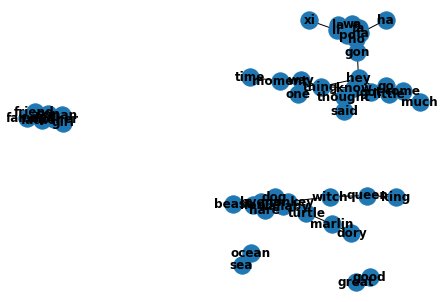

In [488]:
# Don't use
#nx.draw(G, with_labels=True, font_weight='bold')

In [274]:
#Draw network from Networkx graph
nt = Network('2000px', '2000px')
# populates the nodes and edges data structures
nt.from_nx(G)
#nt.
nt.show('G.html')

In [474]:
## Draw network with pyvis
# Creates network based on cosine similarity of words

net = Network('700px', '700px')

# Colors by category
colors = {
    #nouns
    'NN': '#0066CC',
    'NNP': '#0066CC',
    'NNS': '#0066CC',
    'NNPS': '#0066CC',
    
    #verbs
    'VBG': '#FF0000',
    'VBD': '#FF0000',
    'VB': '#FF0000',
    'VBP': '#FF0000',
    #adjectives
    'JJ': '#FF9933',
    'JJR': '#FF9933',
    'JJS': '#FF9933',
    #function words
    'CC': '#660099',
    # other
    'RB': '#33CC33',
    'IN': '#33CC33',
    'RBR': '#33CC33',
    'RBS': '#33CC33',
    'RB': '#33CC33',
    'CD': '#33CC33',
    'DT': '#33CC33',
    'WDT': '#33CC33',
    'WP': '#33CC33',
    'WRB': '#33CC33',
    'FW': '#33CC33'
    
}
options = {"node_size": 10, "alpha": 0.3}

for ((w1, t1), (w2, t2)) in [(x, y) for x in tokens for y in tokens]:
    try:
        if w1 != w2 and cosine_similarity(wv[w1], wv[w2]) >= 0.4:
            #tags words by category
            tag = nltk.pos_tag([w1])[0][1]
            net.add_node(w1, color=colors[tag])

            tag = nltk.pos_tag([w2])[0][1]
            net.add_node(w2, color=colors[tag])
            net.add_edge(w1, w2)
    except KeyError:
        continue
#for node in net:
#    net.add_nodes[node]['group'] = nltk.pos_tag([node])[0][1]

In [475]:
# Export network as html
net.show('30new.html')